In [1]:
from modules.dataloader import *
from modules.models import *
from modules.trainer import *
from modules.evaluator import *

# Deep5hmC-binary

[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/1
Train loss: 0.345424, Train accuracy: 0.8451
Val loss: 0.368894, Val accuracy: 0.8473

[INFO] total time taken to train the model: 6.59s
[INFO]  resume best model...
[INFO] evaluating network...
Test: acc 0.853, auc 0.934, f1 0.858, precision 0.896, recall 0.824,R 0.627, auprc 0.929



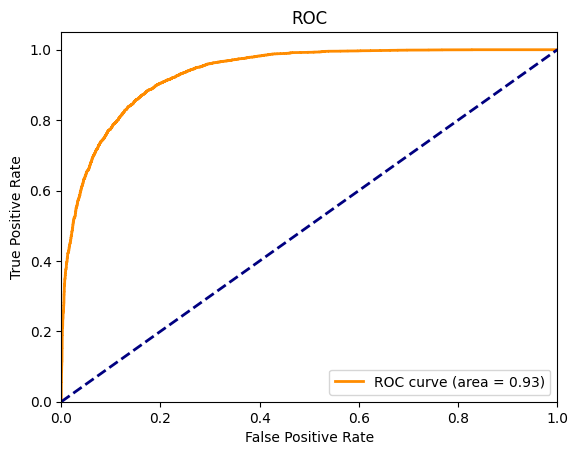

[0.853, 0.934, 0.858, 0.896, 0.824, 0.627, 0.929]

In [127]:
# load data for predicting binary 5hmC peaks
data_binary = MyDataset_binary(64*8,['H3K4me1','H3K4me3'])

# load Deep5hmC_binary
model_binary = Deep5hmC_binary(input_read_size=data_binary.read_size)

# train Deep5hmC_binary
# trainer = Trainer(num_epochs=1, lr=1e-3, earlystop_thresh=20)

# trainer.fit_binary(model_binary,data_binary)

# evaluate Deep5hmC_binary
evaluator = Evaluator(model_binary, './parameters/Deep5hmC_binary.pth')

evaluator.eval_model_binary(data_binary,verbose=1)

# Deep5hmC-cont

In [147]:
# load data for predicting continuous 5hmC read counts
data_cont = MyDataset_cont(64*8,['H3K4me1','H3K4me3'])

# load Deep5hmC_cont
model_cont = Deep5hmC_cont(input_read_size=data_cont.read_size)


# train Deep5hmC_binary
trainer = Trainer(num_epochs=200, lr=1e-3, earlystop_thresh=20)

trainer.fit_cont(model_cont,data_cont)


# evaluate Deep5hmC_binary
evaluator = Evaluator(model_cont, './parameters/Deep5hmC_cont.pth')

evaluator.eval_model_cont(data_cont,verbose=1)

[INFO] resume best model...
[INFO] evaluating network...
Test: MSE 0.668, R 0.872



(0.668, 0.872)

# Deep5hmC-gene

In [137]:
# load data for predicting gene expression
data_gene = MyDataset_gene(64*8,['H3K4me1','H3K4me3'])

# load Deep5hmC_gene
model_gene = Deep5hmC_gene(input_read_size=data_gene.read_size)

# evaluate Deep5hmC_gene (Note: Using pretrained Deep5hmC_cont)
evaluator = Evaluator(model_gene, './parameters/Deep5hmC_cont.pth')

evaluator.eval_model_gene(data_gene,verbose=1)

[INFO]  resume best model...
[INFO] evaluating network...
Test(5hmC): MSE 1.063, R 0.949
Test(RNA): MSE 8.164, R 0.544



(1.0627114828480595, 0.9492841759525377, 8.163945159330325, 0.5439838451104351)

# Deep5hmC-diff

./h5/['H3K4me3', 'H3K27ac']_diff.h5 exists and load data directly.
[INFO] using GPU
[INFO] training the network...
[INFO] EPOCH: 1/200
Train loss: 0.705674, Train accuracy: 0.5279
Val loss: 0.913296, Val accuracy: 0.5963

[INFO] EPOCH: 6/200
Train loss: 0.654127, Train accuracy: 0.6223
Val loss: 0.869933, Val accuracy: 0.6146

[INFO] EPOCH: 11/200
Train loss: 0.644443, Train accuracy: 0.6360
Val loss: 0.870295, Val accuracy: 0.6126

[INFO] EPOCH: 16/200
Train loss: 0.626205, Train accuracy: 0.6595
Val loss: 0.882077, Val accuracy: 0.6085

[INFO] EPOCH: 21/200
Train loss: 0.653388, Train accuracy: 0.6677
Val loss: 0.906560, Val accuracy: 0.5963

[INFO] EPOCH: 26/200
Train loss: 0.558693, Train accuracy: 0.7090
Val loss: 0.928300, Val accuracy: 0.6004

Early stopped training at epoch 26
[INFO] total time taken to train the model: 13.20s
[INFO] resume best model...
[INFO] evaluating network...
Test: acc 0.650, auc 0.689, f1 0.667, precision 0.624, recall 0.716,R 0.322, auprc 0.746



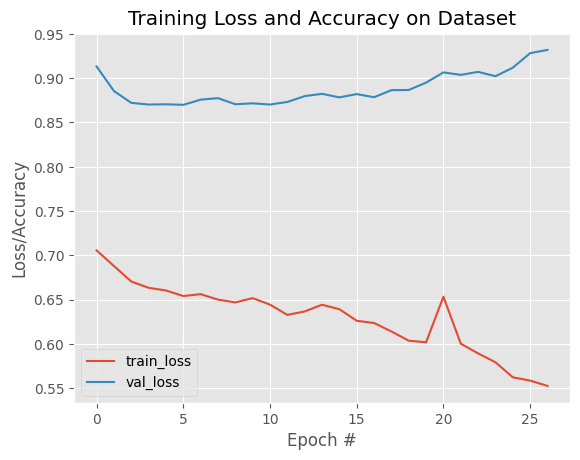

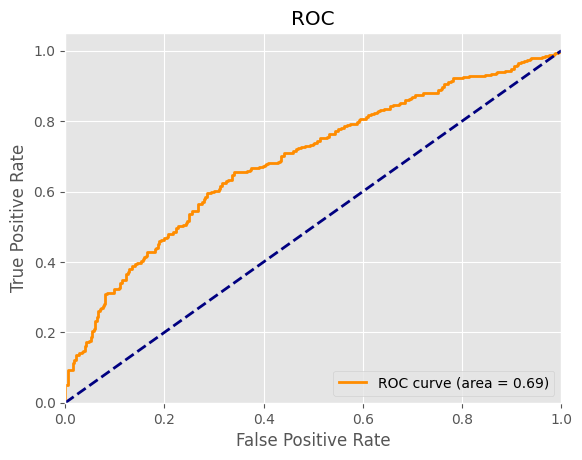

[0.65, 0.689, 0.667, 0.624, 0.716, 0.322, 0.746]

In [146]:
# load data for predicting DhMRs
data_diff = MyDataset_diff(64*2,['H3K4me3','H3K27ac'])

# load Deep5hmC_diff
model_diff = Deep5hmC_diff(input_read_size=data_diff.read_size)

# train Deep5hmC_diff
trainer = Trainer(num_epochs=200, lr=1e-3, earlystop_thresh=20)

trainer.fit_diff(model_diff,data_diff)

# Evaluate Deep5hmC_diff
evaluator = Evaluator(model_diff, './parameters/Deep5hmC_diff.pth')

evaluator.eval_model_diff(data_diff,verbose=1)